2DOF :  2 angles
Circular obstacles that it cannot bump into
1. Calculate config space for these two robots 
2. Make arms rectangular 
3. You can decide length and width of arms
4. 3 spheres obstacles -> you decide diameter and location
5. Calculate configuration space by randomly sampling and see if it collides
    1. Sample every combination 
    2. Get an image  - > (workspace, config_space)
6.  Train from work space to estimate config space
    1. See if shape 


In [3]:
import math
from shapely.geometry import Polygon,Point,LineString,MultiPoint
from shapely import affinity
import matplotlib.pyplot as plt

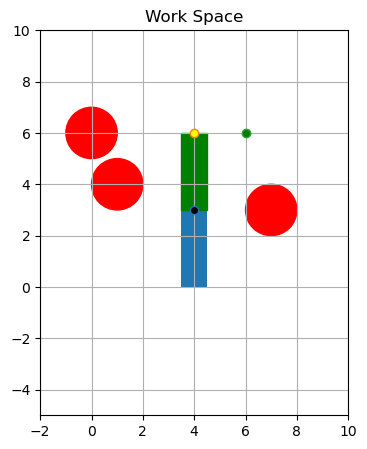

In [8]:
robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])


robot_arm2 = Polygon([
   (3.5, 3),
    (3.5,6),
    (4.5,6),
    (4.5, 3),
])


rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[6]]
goal = [[6],[6]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((0,6),1,color='r')
obstacle_2 = plt.Circle((1,4),1,color='r')
obstacle_3 = plt.Circle((7,3),1,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm2.exterior.xy,color='green')
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [9]:
# different positions of first arm:
import math
results = []
len_arm = 3
x_offset = 4
for i in range(181):
    x,y = len_arm * math.cos(math.radians(i)),len_arm * math.sin(math.radians(i))
    results.append([x+x_offset,y])

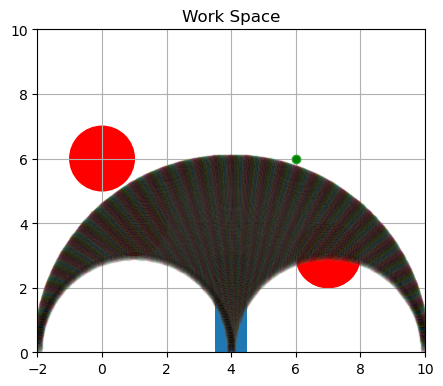

In [39]:
robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])

rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[3]]
goal = [[6],[6]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((0,6),1,color='r')
obstacle_2 = plt.Circle((1,4),1,color='r')
obstacle_3 = plt.Circle((7,3),1,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot()

for pt in results:
    ax.plot(pt[0],pt[1],marker='o',markerfacecolor='black',alpha=.05)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [42]:
# different poositions of first arm:
import math
results = []
len_arm_1 = 3
len_arm_2 = 3
x_offset = 4
y_offset = 0
for i in range(181):
    arm_1_x,arm_1_y = len_arm_1 * math.cos(math.radians(i)) + x_offset,len_arm_1 * math.sin(math.radians(i)) + y_offset
    for j in range(181):
        arm_2_x = len_arm_2 * math.cos(math.radians(j)) + arm_1_x
        arm_2_y = len_arm_2 * math.sin(math.radians(j)) + arm_1_y
        results.append([arm_2_x,arm_2_y])


In [43]:
def get_points_discret(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    for i in q1:
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in q2:
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [34]:
def get_points_continuous(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    count = 0
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            count += 1
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [35]:
points_c  = get_points_continuous(4,0,3,3,[0,180],[0,180])

In [36]:
def get_points_continuous(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    count = 0
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            count += 1
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [37]:
i = 90
j = 45
len_q1 = len_q2 = 3
x_offset = 4
y_offset = 0

arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
goal_x,goal_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y


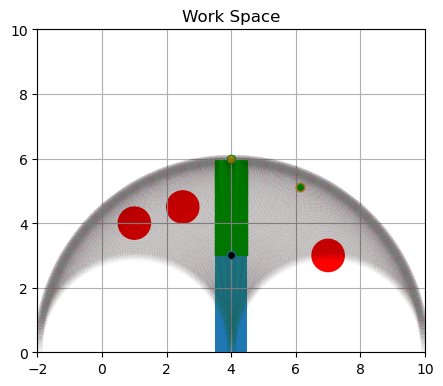

In [38]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])


robot_arm2 = Polygon([
   (3.5, 3),
    (3.5,6),
    (4.5,6),
    (4.5, 3),
])


rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[6]]
goal = [goal_x,goal_y]
fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((2.5,4.5),.5,color='r')
obstacle_2 = plt.Circle((1,4),.5,color='r')
obstacle_3 = plt.Circle((7,3),.5,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm2.exterior.xy,color='green')
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker='o',markerfacecolor='yellow')


for pt in points_c:
    ax.plot(pt[0],pt[1],marker='o',markerfacecolor='grey',alpha=.005)

ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [18]:
def get_(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [19]:
def get_c_obs(vertices,len_q_1,q1):
    result = []
    for i in [0,45,90,135,180]:
        x = tuple([tuple((math.cos(math.radians(i)) + v_x),math.sin(math.radians(i)) + v_y) for (v_x,v_y) in vertices])
        result.append(x)
    return result


In [20]:
base_polygon = Polygon([
    (4,0),
    (4,1),
    (7,1),
    (7,0)
])
ref_pt = (4,0)


obst_1 = Point(7,0).buffer(1)

obstacles = [obst_1]

In [21]:
def get_cobs(base_polygon,ref_pt,obstacles):
    q1_cobs = []
    for i in [0,45,90,135,180]:
        arm_rotated = affinity.rotate(base_polygon,i,ref_pt)
        for obst in obstacles:
            if arm_rotated.intersects(obst):
                q1_cobs.append(i)
    return q1_cobs


In [22]:
assert 0 in get_cobs(base_polygon,ref_pt,obstacles)

In [23]:
def get_cobs(base_polygon,ref_pt,obstacles,q1):
    q1_cobs = []
    for i in range(q1[0],q1[1]+1):
        arm_rotated = affinity.rotate(base_polygon,i,ref_pt)
        for obst in obstacles:
            if arm_rotated.intersects(obst):
                q1_cobs.append(i)
    return q1_cobs


In [24]:
 get_cobs(base_polygon,ref_pt,obstacles,[0,180])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

[(8.0, 0.0), (8.0, 1.0), (5.0, 0.0), (5.0, 1.0)]


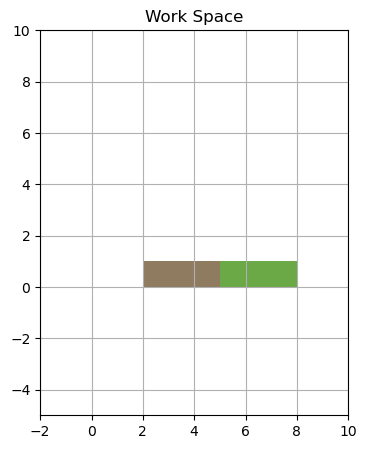

In [47]:
robot_arm1 = MultiPoint([
    (2,0),
    (2, 1),
    (5, 1),
    (5,0)
]).convex_hull


big_poly = MultiPoint([
    (2,0),
    (2, 1),
    (8, 1),
    (8,0)
]).convex_hull


points = list(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords))) + list(
set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))

print(points)
top_arm = MultiPoint(list(points)).convex_hull

# print(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords)))
# print(set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))


fig,ax = plt.subplots(figsize=(5,5))
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*big_poly.exterior.xy,alpha=.5)
ax.fill(*top_arm.exterior.xy,alpha=.7)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
# ax.add_artist(obstacle_2)
# ax.add_artist(obstacle_3)
plt.grid()


POLYGON ((2 0, 1 0, 1 3, 2 3, 2 0))


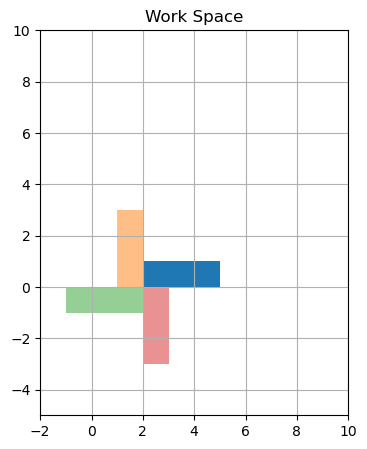

In [56]:
from shapely.geometry import Polygon, LineString,MultiPoint
import matplotlib.pyplot as plt
from shapely import affinity

robot_arm1 = MultiPoint([
    (2,0),
    (2, 1),
    (5, 1),
    (5,0)
]).convex_hull


big_poly = MultiPoint([
    (2,0),
    (2, 1),
    (8, 1),
    (8,0)
]).convex_hull

ref_pt = (2,0)

robot_arm1_rotate = affinity.rotate(robot_arm1,90,ref_pt)
print(robot_arm1_rotate)
robot_arm1_rotate_1 = affinity.rotate(robot_arm1_rotate,90,ref_pt)
robot_arm1_rotate_2 = affinity.rotate(robot_arm1_rotate_1,90,ref_pt)

big_poly = affinity.rotate(big_poly,90,ref_pt)


points = list(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords))) + list(
set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))

# print(points)
sorted_pts = sorted(points,key=lambda x: (x[0],x[1]))
# print(sorted_pts)
# print(sorted_pts[0])
top_arm = MultiPoint(list(points)).convex_hull
top_arm = affinity.rotate(top_arm,-90,sorted_pts[0])

fig,ax = plt.subplots(figsize=(5,5))
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm1_rotate.exterior.xy,alpha=.5)
ax.fill(*robot_arm1_rotate_1.exterior.xy,alpha=.5)
ax.fill(*robot_arm1_rotate_2.exterior.xy,alpha=.5)

# ax.fill(*top_arm.exterior.xy,alpha=.7)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
plt.grid()


In [8]:
def calculate_cobs(comb_poly,arm_1,q_1,q_2,ref_pt,obstacles):
    c_obs = []
    for i in range(q_1[0],q_1[1]+1):
        rotated_big_poly = affinity.rotate(comb_poly,i,ref_pt)
        rotated_arm_1 = affinity.rotate(arm_1,i,ref_pt)
        if i in range(90):
            arm_1_ref_pt = sorted(rotated_arm_1.exterior.coords,key=lambda x: (-x[0],-x[1]))
        elif i in range(90,180):
            arm_1_ref_pt = sorted(rotated_arm_1.exterior.coords,key=lambda x: (-x[0],-x[1]))
        elif i in range(180,270):
             arm_1_ref_pt = sorted(rotated_arm_1.exterior.coords,key=lambda x: (-x[0],-x[1]))
        else:
             arm_1_ref_pt = sorted(rotated_arm_1.exterior.coords,key=lambda x: (-x[0],-x[1]))
        for j in range(q_2[0],q_2[1],-1):
                arm_2_points = list(set(rotated_big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords))) + \
                list(set(robot_arm1.exterior.coords).difference(set(rotated_big_poly.exterior.coords)))
                arm_2 = MultiPoint(list(arm_2_points)).convex_hull
                rotated_arm_2 = affinity.rotate(arm_2,j,arm_1_ref_pt)
                for obstacle in obstacles:
                    if rotated_arm_1.intersects(obstacle) or rotated_arm_2.intersects(obstacle):
                        c_obs.append((i,abs(j)))
    return c_obs

In [7]:
robot_arm1 = MultiPoint([
    (2,0),
    (2, 1),
    (5, 1),
    (5,0)
]).convex_hull

big_poly = MultiPoint([
    (2,0),
    (2, 1),
    (8, 1),
    (8,0)
]).convex_hull

ref_pt = (2,0)

obst_1 = Point(3,1).buffer(.5)
obst_2 = Point(1,1).buffer(.5)
obst_3 = Point(1,3).buffer(.5)

obstacles = [obst_1,obst_2,obst_3]

calculate_cobs(big_poly,robot_arm1,[0,180],[0,180],ref_pt,obstacles)

NameError: name 'Point' is not defined

False


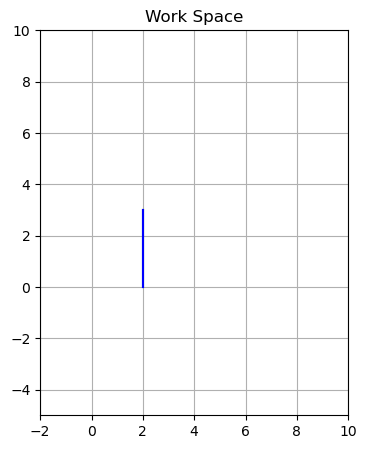

In [166]:
import math
from shapely.geometry import Polygon, LineString,MultiPoint,Point
import matplotlib.pyplot as plt
from shapely import affinity
robot_arm1 = LineString([Point(2,0),Point(5,0)])
total_arm = LineString([Point(2,0),Point(8,0)])

def round_line_string(ls):
    linestring = []
    for point in ls.boundary.geoms:
        linestring.append(Point(round(point.x,4),round(point.y,4)))
    return LineString(linestring)

ref_pt = (2,0)

first,last = robot_arm1.boundary.geoms

robot_arm1_rotate = round_line_string(affinity.rotate(robot_arm1,90,ref_pt))
total_arm_rotated = round_line_string(affinity.rotate(total_arm,90,ref_pt))

robot_arm2 = LineString([robot_arm1_rotate.boundary.geoms[1],total_arm_rotated.boundary.geoms[1]])

robot_arm2 = round_line_string(affinity.rotate(robot_arm2,-180,robot_arm1_rotate.boundary.geoms[1]))

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(*robot_arm1_rotate.xy,color='green')
ax.plot(*robot_arm2.xy,color='blue')

print(type(robot_arm2.intersection(robot_arm1_rotate)) == Point)

ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
plt.grid()

In [3]:
def round_line_string(ls):
    linestring = []
    for point in ls.boundary.geoms:
        linestring.append(Point(round(point.x,4),round(point.y,4)))
    return LineString(linestring)

def calculate_cobs(arm_1,total_arm,q_1,q_2,obst):
    rf_pt = robot_arm1.boundary.geoms[0]
    c_obs_pts = []
    for i in q_1:
        arm_1_rotated = round_line_string(affinity.rotate(arm_1,i,rf_pt))
        total_arm_rotated = round_line_string(affinity.rotate(total_arm,i,rf_pt))
        arm_2 = round_line_string(LineString([arm_1_rotated.boundary.geoms[1],total_arm_rotated.boundary.geoms[1]]))
        arm_2_rf_pt = arm_2.boundary.geoms[0]
        for j in q_2:
        # for j in range(q_2[0],q_2[1],-1):
            arm_2_rotated = round_line_string(affinity.rotate(arm_2,j,arm_2_rf_pt))
            if type(arm_2_rotated.intersection(arm_1_rotated)) != Point:
                c_obs_pts.append((i,abs(j)))
                break
            for o in obst:
                if arm_2_rotated.intersects(o) or arm_1_rotated.intersects(o):
                    c_obs_pts.append((i,abs(j)))
                    break
    return c_obs_pts




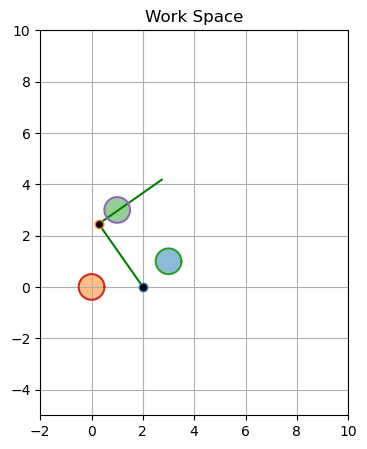

In [4]:
import math
from shapely.geometry import LineString,MultiPoint,Point
import matplotlib.pyplot as plt
from shapely import affinity

# two functions for plotting
def plot_coords(coords):
    pts = list(coords)
    x, y = zip(*pts)
    plt.plot(x,y)

def plot_polys(polys):
    for poly in polys:
        plot_coords(poly.exterior.coords)
        plt.fill_between(*poly.exterior.xy, alpha=.5)

robot_arm1_og = LineString([Point(2,0),Point(5,0)])
total_arm_og = LineString([Point(2,0),Point(8,0)])

robot_arm1 = round_line_string(affinity.rotate(robot_arm1_og,125,robot_arm1_og.boundary.geoms[0]))
total_arm = round_line_string(affinity.rotate(total_arm_og,125,total_arm_og.boundary.geoms[0]))

robot_arm2 = round_line_string(LineString([robot_arm1.boundary.geoms[1],total_arm.boundary.geoms[1]]))
robot_arm2 = round_line_string(affinity.rotate(robot_arm2,-90,robot_arm2.boundary.geoms[0]))


fig,ax = plt.subplots(figsize=(5,5))
ax.plot(*robot_arm1.xy,color='green')
ax.plot(*robot_arm2.xy,color='green')
ax.plot(*robot_arm1.boundary.geoms[0].xy,marker="o",markerfacecolor="black")
ax.plot(*robot_arm2.boundary.geoms[0].xy,marker="o",markerfacecolor="black")

obst_1 = Point(3,1).buffer(.5)
obst_2 = Point(0,0).buffer(.5)
obst_3 = Point(1,3).buffer(.5)

obstacles = [obst_1,obst_2,obst_3]

ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
plot_polys(obstacles)
plt.grid()

In [31]:
c_obs_pts = calculate_cobs(robot_arm1_og,total_arm_og,[0,45,90,120],[0,-25,-45,-90],obstacles)
print(c_obs_pts)

[(45, 0), (45, 25), (45, 45), (45, 90), (120, 45), (120, 90)]


In [50]:
import math
from shapely.geometry import LineString,MultiPoint,Point
import matplotlib.pyplot as plt
from shapely import affinity

# two functions for plotting
def plot_coords(ax,coords):
    pts = list(coords)
    x, y = zip(*pts)
    ax.plot(x,y)

def plot_polys(ax,polys):
    for poly in polys:
        plot_coords(ax,poly.exterior.coords)
        ax.fill_between(*poly.exterior.xy, alpha=.5)

def plot_work_space_with_detected_collision_pts(robot_arm1_og,total_arm_og,obstacles,detected_collision_pts):
    fig,axs = plt.subplots(3,2,figsize=(10,15))
    fig.suptitle("Work space with detected collisions", fontsize=14)
    count = 0
    for i in range(3):
        for j in range(2):
            arm_1_rot,arm_2_rot = detected_collision_pts[count]
            count += 1
            robot_arm1 = round_line_string(affinity.rotate(robot_arm1_og,arm_1_rot,robot_arm1_og.boundary.geoms[0]))
            total_arm = round_line_string(affinity.rotate(total_arm_og,arm_1_rot,total_arm_og.boundary.geoms[0]))

            robot_arm2 = round_line_string(LineString([robot_arm1.boundary.geoms[1],total_arm.boundary.geoms[1]]))
            robot_arm2 = round_line_string(affinity.rotate(robot_arm2,-arm_2_rot,robot_arm2.boundary.geoms[0]))

            axs[i,j].plot(*robot_arm1.xy,color='green')
            axs[i,j].plot(*robot_arm2.xy,color='green')
            axs[i,j].plot(*robot_arm1.boundary.geoms[0].xy,marker="o",markerfacecolor="black")
            axs[i,j].plot(*robot_arm2.boundary.geoms[0].xy,marker="o",markerfacecolor="black")
            axs[i,j].set_title(f"Collision at ({arm_1_rot},{arm_2_rot})")
            plot_polys(axs[i,j],obstacles)

            axs[i,j].set_xlim([-2,10])
            axs[i,j].set_ylim([-5,10])
            axs[i,j].grid()

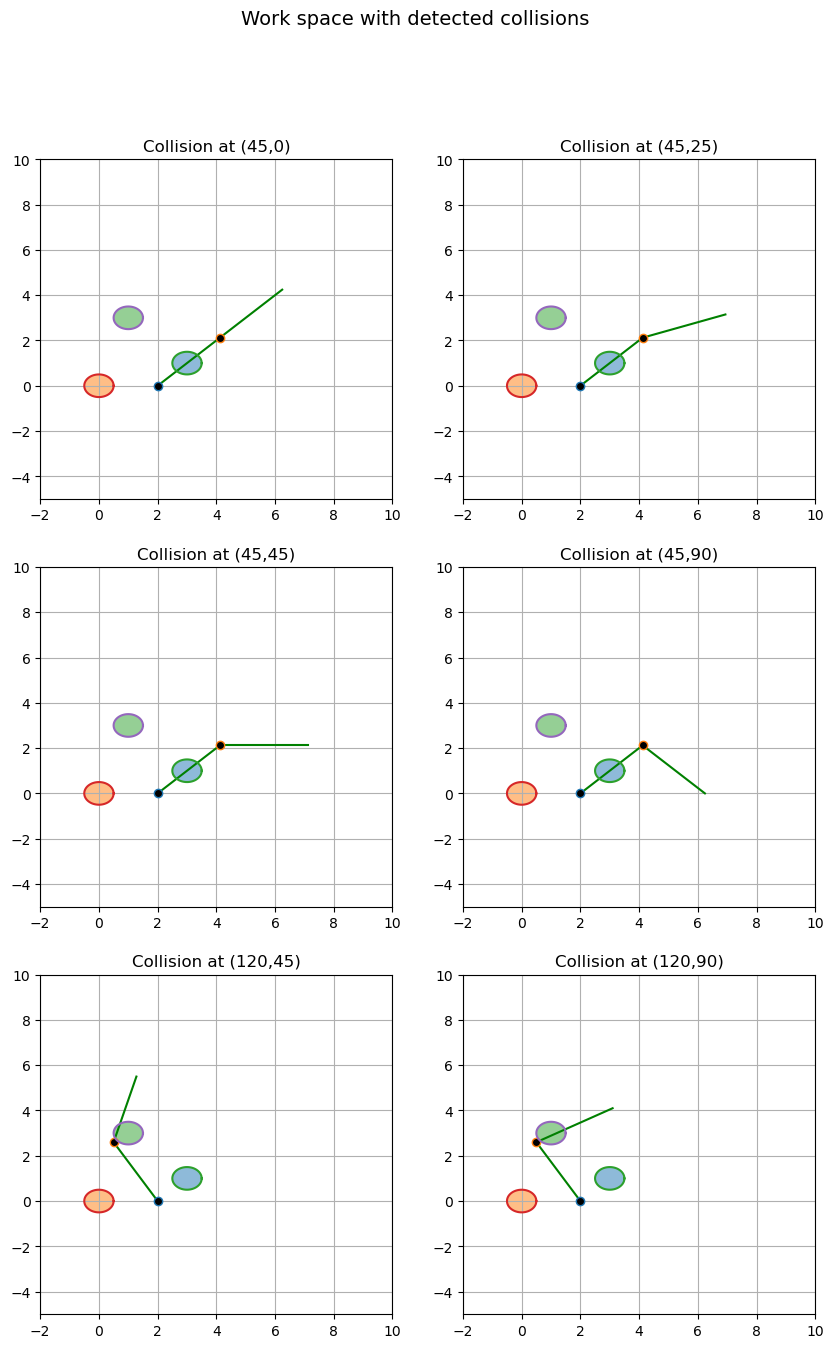

In [51]:
plot_work_space_with_detected_collision_pts(robot_arm1_og,total_arm_og,obstacles,c_obs_pts)